In [1]:
import pandas as pd
import numpy as np

In [2]:
#play with np.power
mylist = [1., 2., 3.]
tmp = np.array(mylist)
tmp_cubed = np.power(tmp, 3)
print (tmp)
print (tmp_cubed)

[1. 2. 3.]
[ 1.  8. 27.]


In [3]:
#play with np.power
ex_df = pd.DataFrame()
ex_df['power_1'] = tmp
print (ex_df)

   power_1
0      1.0
1      2.0
2      3.0


In [4]:
#Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up
#to a specific degree:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = np.power(feature, power)
    return poly_dataframe

In [5]:
#To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:
print (polynomial_dataframe(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


In [6]:
#Visualizing polynomial regression
#Let's use matplotlib to visualize what a polynomial regression looks like on some real data.
sales = pd.read_csv('kc_house_data.csv')

In [7]:
#As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. 
#For houses with identical square footage, we break the tie by their prices.
sales = sales.sort_values(['sqft_living', 'price'])
sales[:2]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000


In [8]:
#Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target
poly1_data[:2]

,power_1,price
19452,290,142000.0
15381,370,276000.0


In [9]:
# Create linear regression object
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

In [10]:
# Train a regression model
model1 = regr.fit(poly1_data['power_1'].values.reshape((-1,1)), poly1_data['price'])

In [11]:
#let's take a look at the weights before we plot
print('model 1:','Coefficients: \n', regr.coef_)
# The intercept of model1
print('model 1:','intercept: \n', regr.intercept_)

model 1: Coefficients: 
 [280.6235679]
model 1: intercept: 
 -43580.74309447396


In [12]:
model1.predict(poly1_data['power_1'].values.reshape((-1,1)))

array([  37800.09159579,   60249.97702758,   63056.21270656, ...,
       2773879.87859591, 3337933.25006978, 3756062.36623698])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

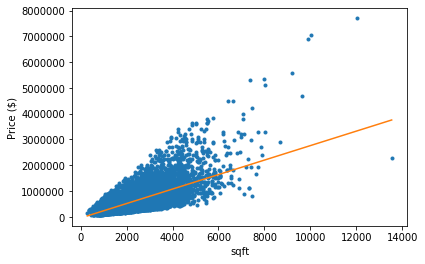

In [14]:
fig = plt.figure()
plt.xlabel('sqft')
plt.ylabel('Price ($)')
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data['power_1'].values.reshape((-1,1))),'-')

In [15]:
#What if we wanted to plot a second degree polynomial?
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = poly2_data.columns.values.tolist() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
poly2_data[:2]
#my_features

,power_1,power_2,price
19452,290,84100,142000.0
15381,370,136900,276000.0


In [16]:
#Train model2
model2 = regr.fit(poly2_data[my_features].values.reshape((-1,2)), poly2_data['price'])

In [17]:
#let's take a look at the weights before we plot
print('model 2:','Coefficients: \n', regr.coef_)
# The intercept of model1
print('model 2:','intercept: \n', regr.intercept_)

model 2: Coefficients: 
 [6.79940947e+01 3.85812609e-02]
model 2: intercept: 
 199222.27930548496


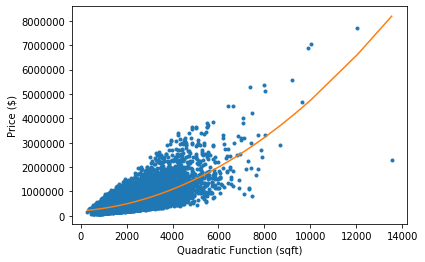

In [18]:
fig = plt.figure()
plt.xlabel('Quadratic Function (sqft)')
plt.ylabel('Price ($)')
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data[my_features].values.reshape((-1,2))),'-')

In [19]:
#The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
my_features = poly3_data.columns.values.tolist() # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
model3 = regr.fit(poly3_data[my_features].values.reshape((-1,3)), poly3_data['price'])

In [20]:
#let's take a look at the weights before we plot
print('model 3:','Coefficients: \n', regr.coef_)
# The intercept of model1
print('model 3:','intercept: \n', regr.intercept_)

model 3: Coefficients: 
 [-9.01819864e+01  8.70465089e-02 -3.84055260e-06]
model 3: intercept: 
 336819.7482214633


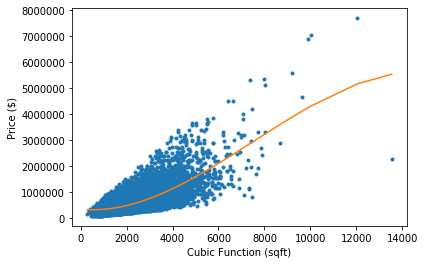

In [21]:
fig = plt.figure()
plt.xlabel('Cubic Function (sqft)')
plt.ylabel('Price ($)')
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data[my_features].values.reshape((-1,3))),'-')

In [22]:
#Now try a 15th degree polynomial:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
my_features = poly15_data.columns.values.tolist() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = regr.fit(poly15_data[my_features].values.reshape((-1,15)), poly15_data['price'])
poly15_data[:2]

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,-5315590925028654848,8005133933292429824,-2800912632598854656,-607924210447579136,8169419707297566720,7948473681471741952,-785641586888785920,-6475131313233297408,142000.0
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,759807991618519296,4427795793208865280,-3475779072869940224,5233828197790730240,-391694556932730880,2646966524565987328,1700178182809075712,1876629133233258496,276000.0


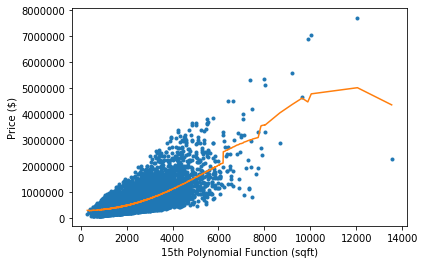

In [23]:
fig = plt.figure()
plt.xlabel('15th Polynomial Function (sqft)')
plt.ylabel('Price ($)')
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data[my_features].values.reshape((-1,15))),'-')

In [24]:
#Changing the data and re-learning
#We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). 
#The quiz will ask you some questions about these results.
#First, read the four sets of data into data frame
set1_sales = pd.read_csv('wk3_kc_house_set_1_data.csv')
set2_sales = pd.read_csv('wk3_kc_house_set_2_data.csv')
set3_sales = pd.read_csv('wk3_kc_house_set_3_data.csv')
set4_sales = pd.read_csv('wk3_kc_house_set_4_data.csv')
set1_sales[:2]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,9212900260,20140527T000000,468000.0,2,1.0,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000


In [25]:
#Fit model 15 for data set1
set1_poly15_data = polynomial_dataframe(set1_sales['sqft_living'], 15)
my_features = set1_poly15_data.columns.values.tolist() # get the name of the features
set1_poly15_data['price'] = set1_sales['price'] # add price to the data since it's the target
set1_model15 = regr.fit(set1_poly15_data[my_features].values.reshape((-1,15)), set1_poly15_data['price'])

In [26]:
#let's take a look at the weights of model 15 for data set1
print('model 15 of set 1:','Coefficients: \n', regr.coef_)
# The intercept of model1
print('model 15 of set 1:','intercept: \n', regr.intercept_)

model 15 of set 1: Coefficients: 
 [ 2.38253721e-05  4.63936517e-02  3.31225600e-06 -3.44530658e-10
 -1.19454423e-14  1.03088640e-16  3.59569162e-18  7.12709297e-16
 -3.25035141e-16 -2.16627705e-17 -8.36036607e-16 -8.42409033e-17
  2.00904038e-17 -6.09981945e-17  8.05023433e-16]
model 15 of set 1: intercept: 
 272444.98442561826


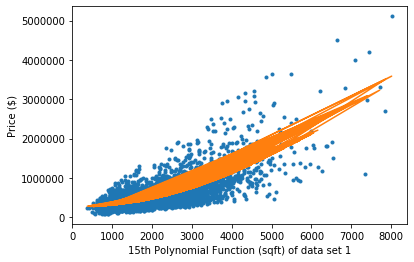

In [27]:
#Plot model 15 of data set 1
fig = plt.figure()
plt.xlabel('15th Polynomial Function (sqft) of data set 1')
plt.ylabel('Price ($)')
plt.plot(set1_poly15_data['power_1'],set1_poly15_data['price'],'.',
        set1_poly15_data['power_1'], set1_model15.predict(set1_poly15_data[my_features].values.reshape((-1,15))),'-')

In [28]:
#Fit model 15 for data set2
set2_poly15_data = polynomial_dataframe(set2_sales['sqft_living'], 15)
my_features = set2_poly15_data.columns.values.tolist() # get the name of the features
set2_poly15_data['price'] = set2_sales['price'] # add price to the data since it's the target
set2_model15 = regr.fit(set2_poly15_data[my_features].values.reshape((-1,15)), set2_poly15_data['price'])

In [29]:
#let's take a look at the weights of model 15 for data set2
print('model 15 of set 2:','Coefficients: \n', regr.coef_)
# The intercept of model1
print('model 15 of set 2:','intercept: \n', regr.intercept_)

model 15 of set 2: Coefficients: 
 [ 2.67155511e-05  6.40556752e-02 -3.84618250e-06  2.29090041e-10
 -8.15742504e-15 -1.32172648e-16 -7.85784767e-16 -3.57190167e-16
  4.43828580e-16 -9.60603813e-16  4.91905616e-16  4.67052282e-16
 -1.48445015e-16 -8.99147526e-16  4.77091111e-16]
model 15 of set 2: intercept: 
 254408.64912786963


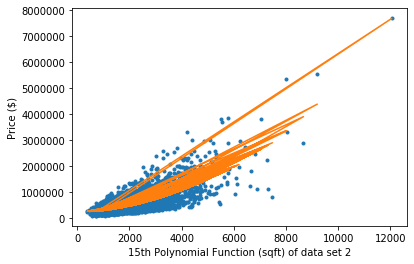

In [30]:
#Plot model 15 of data set 2
fig = plt.figure()
plt.xlabel('15th Polynomial Function (sqft) of data set 2')
plt.ylabel('Price ($)')
plt.plot(set2_poly15_data['power_1'],set2_poly15_data['price'],'.',
        set2_poly15_data['power_1'], set2_model15.predict(set2_poly15_data[my_features].values.reshape((-1,15))),'-')

model 15 of set 3: Coefficients: 
 [ 2.60388711e-05  5.68788383e-02 -1.39246504e-06  1.14121008e-10
 -1.25689168e-14 -6.12614906e-16 -1.26607380e-16  3.14000306e-16
 -9.59549622e-16 -3.41182907e-17  8.90214783e-16  1.07438302e-15
  4.58072606e-16 -1.67669843e-16 -4.37777194e-16]
model 15 of set 3: intercept: 
 265708.82266769547


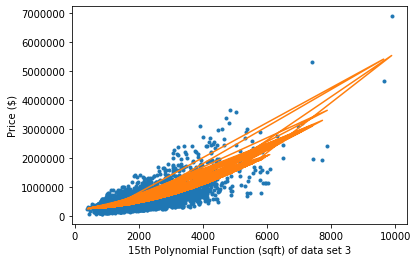

In [31]:
#Fit model 15 for data set3
set3_poly15_data = polynomial_dataframe(set3_sales['sqft_living'], 15)
my_features = set3_poly15_data.columns.values.tolist() # get the name of the features
set3_poly15_data['price'] = set3_sales['price'] # add price to the data since it's the target
set3_model15 = regr.fit(set3_poly15_data[my_features].values.reshape((-1,15)), set3_poly15_data['price'])
#let's take a look at the weights of model 15 for data set3
print('model 15 of set 3:','Coefficients: \n', regr.coef_)
# The intercept of model1
print('model 15 of set 3:','intercept: \n', regr.intercept_)
#Plot model 15 of data set 2
fig = plt.figure()
plt.xlabel('15th Polynomial Function (sqft) of data set 3')
plt.ylabel('Price ($)')
plt.plot(set3_poly15_data['power_1'],set3_poly15_data['price'],'.',
        set3_poly15_data['power_1'], set3_model15.predict(set3_poly15_data[my_features].values.reshape((-1,15))),'-')

model 15 of set 4: Coefficients: 
 [ 1.85050353e-05  4.54228265e-02  4.01958599e-06 -4.77962267e-10
 -3.01892270e-14  2.69712514e-16 -9.48637450e-16  4.55178423e-16
 -4.63371823e-17  3.82648136e-16  3.01228299e-16  1.34814200e-15
  1.62287351e-15 -5.51656067e-16 -2.48217930e-16]
model 15 of set 4: intercept: 
 272463.4254171938


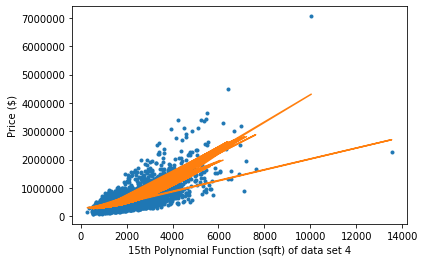

In [32]:
#Fit model 15 for data set4
set4_poly15_data = polynomial_dataframe(set4_sales['sqft_living'], 15)
my_features = set4_poly15_data.columns.values.tolist() # get the name of the features
set4_poly15_data['price'] = set4_sales['price'] # add price to the data since it's the target
set4_model15 = regr.fit(set4_poly15_data[my_features].values.reshape((-1,15)), set4_poly15_data['price'])
#let's take a look at the weights of model 15 for data set3
print('model 15 of set 4:','Coefficients: \n', regr.coef_)
# The intercept of model1
print('model 15 of set 4:','intercept: \n', regr.intercept_)
#Plot model 15 of data set 4
fig = plt.figure()
plt.xlabel('15th Polynomial Function (sqft) of data set 4')
plt.ylabel('Price ($)')
plt.plot(set4_poly15_data['power_1'],set4_poly15_data['price'],'.',
        set4_poly15_data['power_1'], set4_model15.predict(set4_poly15_data[my_features].values.reshape((-1,15))),'-')

In [33]:
#Selecting a Polynomial Degree
#Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to
#select these parameters: validation set. (We will explore another approach in week 4).
test_sales = pd.read_csv('wk3_kc_house_test_data.csv')
train_sales = pd.read_csv('wk3_kc_house_train_data.csv')
valid_sales = pd.read_csv('wk3_kc_house_valid_data.csv')
print ('sales data: ' + str(len(sales)))
print ('testing data: ' + str(len(test_sales)))
print ('training data: '+ str(len(train_sales)))
print ('validation data: ' + str(len(valid_sales)))

sales data: 21613
testing data: 2217
training data: 9761
validation data: 9635


In [34]:
#A functin to calculate RSS
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    predictions = model.predict(data)

    # Then compute the residuals/errors
    residuals = predictions - outcome

    # Then square and add them up
    
    RSS = (residuals * residuals).sum()

    return(RSS)    

In [35]:
'''For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
Add train_data['price'] to the polynomial SFrame
Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
Report which degree had the lowest RSS on validation data (remember python indexes from 0)
(Note you can turn off the print out of linear_regression.create() with verbose = False)'''

"For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))\nBuild an SFrame of polynomial data of train_data['sqft_living'] at the current degree\nhint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)\nAdd train_data['price'] to the polynomial SFrame\nLearn a polynomial regression model to sqft vs price with that degree on TRAIN data\nCompute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.\nReport which degree had the lowest RSS on validation data (remember python indexes from 0)\n(Note you can turn off the print out of linear_regression.create() with verbose = False)"

In [36]:
rssDic = {}
rssDictest = {}
modelDic = {}
for i in range(1,15+1):
    poly_train_data  = polynomial_dataframe(train_sales['sqft_living'], i)
    #print(poly_train_data)
    poly_features = poly_train_data.columns.values.tolist() # get the name of the features
    #print(poly_features)
    #poly_train_data['price'] = train_sales['price']
    modelDic[i] = regr.fit(poly_train_data[poly_features].values.reshape((-1,i)), train_sales['price'])
    
    poly_valid_data = polynomial_dataframe(valid_sales['sqft_living'], i)
    #print(poly_valid_data)
    #poly_valid_data['price'] = valid_sales['price']
    
    poly_test_data = polynomial_dataframe(test_sales['sqft_living'], i)
    predictions = modelDic[i].predict(poly_valid_data[poly_features])
    #print(predictions)
    rssDic[i] = get_residual_sum_of_squares(modelDic[i], poly_valid_data, valid_sales['price'])
    rssDictest[i] = get_residual_sum_of_squares(modelDic[i], poly_test_data, test_sales['price'])
    #print(rssDic[i])
    #print(poly_valid_data[poly_features])
    #print('For model', i, 'Residueal Sum of Square is', rssDic[i])
print('rss of each model on validation data:',rssDic)
print('rss of each model on test data:',rssDictest)


rss of each model on validation data: {1: 629097886299585.8, 2: 623955062706518.0, 3: 625820280251531.0, 4: 629987341468500.4, 5: 623373644830481.8, 6: 623248623641342.0, 7: 623170277145830.6, 8: 623371883707585.0, 9: 623300719513891.0, 10: 623430182085440.4, 11: 623552071862743.2, 12: 623340349900493.2, 13: 623264348723454.8, 14: 623235829390757.4, 15: 623312318244071.2}
rss of each model on test data: {1: 142347931358638.7, 2: 135542039274080.42, 3: 135585996079050.44, 4: 135382681503682.48, 5: 136772700176818.64, 6: 136766797835253.6, 7: 136758855060200.06, 8: 136784771585941.38, 9: 136768695901912.55, 10: 136764725110279.02, 11: 136767006244991.0, 12: 136740283841371.08, 13: 136820083291517.5, 14: 136986402985046.5, 15: 137014883701729.28}


In [37]:
poly_test_data_7  = polynomial_dataframe(test_sales['sqft_living'], 7)
poly_features_7 = poly_test_data_7.columns.values.tolist()
poly_features_7

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7']

In [38]:
#Fit model 7 for training data manually
poly_train_data  = polynomial_dataframe(train_sales['sqft_living'], 7)
poly_features = poly_train_data.columns.values.tolist()
modelDic7 = regr.fit(poly_train_data[poly_features].values.reshape((-1,7)), train_sales['price'])
print('model 7 of training data:','Coefficients: \n', regr.coef_)
# The intercept of model1
print('model 7 of training data:','intercept: \n', regr.intercept_)
prediction = modelDic7.predict(poly_test_data_7[poly_features_7])

model 7 of training data: Coefficients: 
 [ 2.22986075e-05  5.29771551e-02  4.89667451e-07 -4.73451750e-11
 -2.46051321e-14 -2.66385267e-16 -1.44969893e-16]
model 7 of training data: intercept: 
 265611.4374598818


In [39]:
#Quiz question 4 - calculating RSS of test data based on model 7 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_sales['price'], prediction)
print('residual sum of squared error of model 7 on test data', mse*len(test_sales['price']))

residual sum of squared error of model 7 on test data 136758855060200.06


In [40]:
poly_valid_data_6  = polynomial_dataframe(valid_sales['sqft_living'], 6)
poly_features_6 = poly_valid_data_6.columns.values.tolist()
poly_features_6

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6']

In [41]:
#Fit model 6 for training data and calculate RSS based on validation data manually
poly_train_data  = polynomial_dataframe(train_sales['sqft_living'], 6)
poly_features = poly_train_data.columns.values.tolist()
modelDic6 = regr.fit(poly_train_data[poly_features].values.reshape((-1,6)), train_sales['price'])
print('model 6 of training data:','Coefficients: \n', regr.coef_)
# The intercept of model7
print('model 6 of training data:','intercept: \n', regr.intercept_)
prediction = modelDic6.predict(poly_valid_data_6[poly_features_6])
#Calculate RSS of validation data based on model 6
mse = mean_squared_error(valid_sales['price'], prediction)
print('residual sum of squared error of model 6 on validation data', mse*len(valid_sales['price']))

model 6 of training data: Coefficients: 
 [ 2.23178731e-05  5.30034261e-02  4.79345275e-07 -4.66154417e-11
 -2.46209999e-14 -2.72637592e-16]
model 6 of training data: intercept: 
 265680.16580509953
residual sum of squared error of model 6 on validation data 623248623641342.0


In [42]:
poly_valid_data_7  = polynomial_dataframe(valid_sales['sqft_living'], 7)
poly_features_7 = poly_valid_data_7.columns.values.tolist()
poly_features_7

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7']

In [43]:
#Fit model 7 for training data and calculate RSS based on validation data manually
poly_train_data  = polynomial_dataframe(train_sales['sqft_living'], 7)
poly_features = poly_train_data.columns.values.tolist()
modelDic7 = regr.fit(poly_train_data[poly_features].values.reshape((-1,7)), train_sales['price'])
print('model 7 of training data:','Coefficients: \n', regr.coef_)
# The intercept of model 7
print('model 7 of training data:','intercept: \n', regr.intercept_)
prediction = modelDic7.predict(poly_valid_data_7[poly_features_7])
#Calculate RSS of validation data based on model 7
mse = mean_squared_error(valid_sales['price'], prediction)
print('residual sum of squared error of model 7 on validation data', mse*len(valid_sales['price']))

model 7 of training data: Coefficients: 
 [ 2.22986075e-05  5.29771551e-02  4.89667451e-07 -4.73451750e-11
 -2.46051321e-14 -2.66385267e-16 -1.44969893e-16]
model 7 of training data: intercept: 
 265611.4374598818
residual sum of squared error of model 7 on validation data 623170277145830.6


In [44]:
print(modelDic)

{1: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 2: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 3: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 4: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 5: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 6: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 7: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 8: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 9: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 10: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 11: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 12: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normal

In [45]:
#Calculate the least RSS
minRSS =min(rssDic.values())
print('least RSS:', minRSS)

least RSS: 623170277145830.6


In [46]:
# Quiz question 3 - which model has the least RSS. Note that I'm using sckit-learn for regression modeling, which may impact the calculation
print('model degree with least RSS:', min(rssDic, key=rssDic.get))

model degree with least RSS: 7
